In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Rectangle
import numpy as np
import os
from matplotlib.ticker import AutoMinorLocator, LogLocator, NullFormatter

In [2]:
markers = ['o', 's', '+', '^', '.', '*']
LEGEND_SIZE=15
LABEL_SIZE=18
TICK_SIZE=15
FIG_W_SIZE=6
FIG_H_SIZE=3
META_WIDTH = 5
y_minor = LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
META_YLIM=(1,2000000)
META_WIDTH = 5
CMP_Y_LIM=(1, 2000)
SYSTEM_NAME="blueprint"

In [ ]:
DATA_DIR="data/"

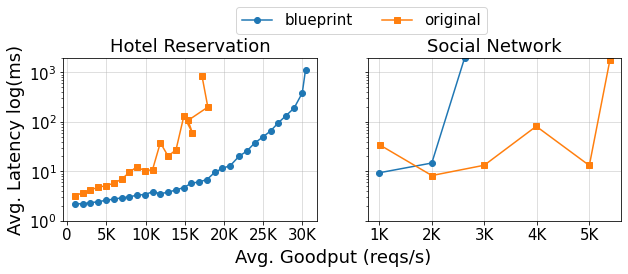

In [3]:
fig, axes = plt.subplots(figsize=(META_WIDTH*2,FIG_H_SIZE),nrows=1, ncols=2)
ax = axes[0]
#ax.set_xlabel('Avg. Goodput (reqs/s)', fontsize=LABEL_SIZE)
ax.set_ylabel('Avg. Latency log(ms)', fontsize=LABEL_SIZE)
ax.set_yscale('log')
ax.tick_params(labelsize=TICK_SIZE)
ax.set_title("Hotel Reservation", fontsize=LABEL_SIZE)
ax.set_xticks(ticks=[0, 5000, 10000, 15000, 20000, 25000, 30000])
ax.set_xticklabels(["0", "5K", "10K", "15K", "20K", "25K", "30K"])
ax.set_ylim(*CMP_Y_LIM)
ax.yaxis.set_minor_locator(y_minor)
ax.yaxis.set_minor_formatter(NullFormatter())
ax.grid(visible=True, which='major', axis='both', alpha=0.5)
i = 0
colors = ['gray', 'darkgray']
systems = ['blueprint', 'original']
for s in systems:
    df = pd.read_csv(DATA_DIR + 'hotel_' + s + "_consolidated.csv")
    ax.plot(df.avg_tput,df.avg_latency, label=s.replace("blueprint", SYSTEM_NAME),marker=markers[i])#, color=colors[i])
    i += 1
#ax.legend(fontsize=LEGEND_SIZE)

systems = ['blueprint', 'original']
ax = axes[1]
#ax.xlabel('Avg. Throughput (reqs/s)', fontsize=LABEL_SIZE)
#ax.ylabel('Avg. Latency log(ms)', fontsize=LABEL_SIZE)
ax.tick_params(labelsize=TICK_SIZE)
ax.set_title("Social Network", fontsize=LABEL_SIZE)

ax.set_yscale('log')
ax.set_ylim(*CMP_Y_LIM)
ax.set_yticklabels([])
ax.yaxis.set_minor_locator(y_minor)
ax.yaxis.set_minor_formatter(NullFormatter())
ax.set_xticks([1000, 2000, 3000, 4000, 5000])
ax.set_xticklabels(["1K", "2K", "3K", "4K", "5K"])
ax.grid(visible=True, which='major', axis='both', alpha=0.5)
i = 0
for s in systems:
    df = pd.read_csv(DATA_DIR + 'socialnetwork_' + s + "_consolidated.csv")
    ax.plot(df.avg_tput[:7],df.avg_latency[:7], label=s.replace("blueprint", SYSTEM_NAME),marker=markers[i])
    i += 1

fig.text(0.5, -0.07, 'Avg. Goodput (reqs/s)', ha='center', fontsize=LABEL_SIZE)
plt.legend(fontsize=LEGEND_SIZE, ncol=2, bbox_to_anchor=(0.5,1.1), loc="lower right")
plt.savefig('dsb_hr_perf_comparison.pdf', bbox_inches='tight', dpi=1200)
plt.show()